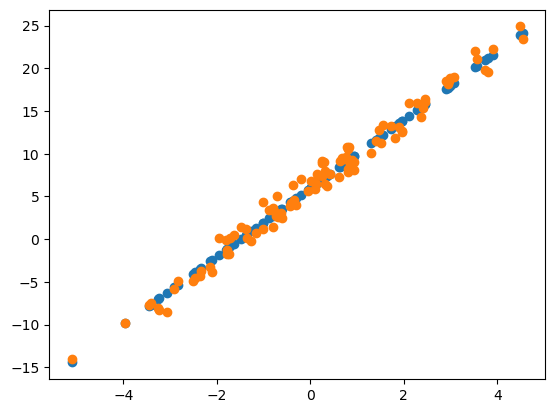

In [80]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

# y=4x+6을 근사(w1=4,w0=6) 임의의 값을 노이즈를 위해 만듦
X=2*np.random.randn(100,1)
y1=6+4*X
y2=6+4*X+np.random.randn(100,1)

# X,y 데이터 세트 산점도로 시각화
plt.scatter(X,y1)
plt.scatter(X,y2)
plt.show()

In [4]:
import numpy as np

# 오차를 구하는 함수
def get_cost(y, y_pred):
    N = len(y)  # 샘플의 갯수 (y의 길이, 즉 데이터 포인트의 개수)
    cost = np.sum(np.square(y - y_pred)) / N  # MSE(Mean Squared Error) 계산: 예측값과 실제값의 차이 제곱의 평균
    return cost

# 각 weight(w0, w1) 업데이트 할 값 계산
# w1 = w1 - 학습율 * 업데이트값(미분) 형태로 weight 업데이트
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)  # 데이터 샘플의 개수 (y의 길이)
    
    # w1_update, w0_update를 각각 w1, w0와 동일한 크기를 가진 0값으로 초기화
    # w1_update = np.zeros_like(w1)  # w1의 크기와 동일한 0 배열
    # w0_update = np.zeros_like(w0)  # w0의 크기와 동일한 0 배열
    w1_update=np.zeros(w1.shape[1])
    w0_update=np.zeros(w0.shape[1])
    
    # 예측값을 계산 (X와 w1을 곱하고 w0을 더함)
    y_pred = np.dot(X, w1.T) + w0  # X*w1.T + w0 = 예측값
    diff = y - y_pred  # 실제값(y)과 예측값(y_pred)의 차이 (오차)

    # w0 업데이트를 위한 계수 행렬 생성 (모든 값이 1인 행렬)
    w0_factors = np.ones((N, 1))  # N개의 1값을 가진 열 벡터
    
    # w1과 w0의 업데이트 값을 계산
    # w1 업데이트는 X와 오차(diff)와의 내적 계산 후 평균내기
    w1_update = -(2 / N) * learning_rate * np.dot(X.T, diff)  # w1 업데이트 공식: X.T와 오차(diff) 내적 후 평균 계산
    
    # w0 업데이트는 오차(diff)와 w0_factors의 내적 계산 후 평균내기
    w0_update = -(2 / N) * learning_rate * np.dot(w0_factors.T, diff)  # w0 업데이트 공식: 1값을 가진 행렬과 오차(diff) 내적 후 평균 계산

    return w1_update, w0_update  # 계산된 w1과 w0 업데이트 값을 반환

# gradient descent 를 하기 위한 함수
def gradient_descent_steps(X,y,iters=1000):
    # w0와 w1을 모두 0으로 초기화
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update,w0_update=get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update
    return w1, w0

X=2*np.random.randn(100,1)
y1=6+4*X
y2=6+4*X+np.random.randn(100,1)
print('='*100)
print('y1')
w1,w0=gradient_descent_steps(X,y1,iters=10000)
print(f'w1: {w1[0,0]}, w0: {w0[0,0]}')
y1_pred= w1[0,0]*X+w0
print(f'y1 Gradient Descent Total Cost : {get_cost(y1,y1_pred)}')

print('='*100)
print('y2')
w1,w0=gradient_descent_steps(X,y2,iters=10000)
print(f'w1: {w1[0,0]}, w0: {w0[0,0]}')
y2_pred= w1[0,0]*X+w0
print(f'y2 Gradient Descent Total Cost : {get_cost(y2,y2_pred)}')

y1
w1: 4.000000000000005, w0: 5.999999999999977
y1 Gradient Descent Total Cost : 6.179029141460402e-28
y2
w1: 3.976844972007069, w0: 5.945239454322084
y2 Gradient Descent Total Cost : 1.0515636169164695


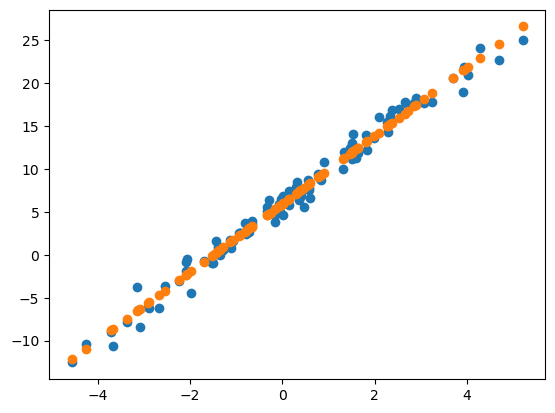

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X,y2)
plt.scatter(X,y2_pred)
plt.show()